<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#read data and write as dictionary with header as keys
#from what i can understand from reading first few questions, this project is basically doing it without pandas vs with pandas
reader = csv.DictReader(open('sat_scores.csv'))

data = {} #declare variables
for row in reader:
    for column, value in row.items():  # consider .iteritems() for Python 2
        data.setdefault(column, []).append(value)
print(data)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df = pd.read_csv('sat_scores.csv')
df

State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
df.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

In [5]:
df.tail()

State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [6]:
df.shape

(52, 4)

In [7]:
df = df.drop(51) #There's only 50 states + DC, we should drop All which is irrelevant in this project

In [8]:
df.tail()

State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
# Create data dictionary.
dictionary = {
    'Columns': list(df.columns.values),
    'Type': list(df.dtypes.values),
    'Description': {
        'State': 'State Name in Two Letters Code',
        'Rate': 'Participation Rate in The State',
        'Verbal': 'Average Verbal Score',
        'Math': 'Average Math Score'
    },
    'Shape': df.shape
}

# Print data dictionary.
pprint(dictionary)

{'Columns': ['State', 'Rate', 'Verbal', 'Math'],
 'Description': {'Math': 'Average Math Score',
                 'Rate': 'Participation Rate in The State',
                 'State': 'State Name in Two Letters Code',
                 'Verbal': 'Average Verbal Score'},
 'Shape': (51, 4),
 'Type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

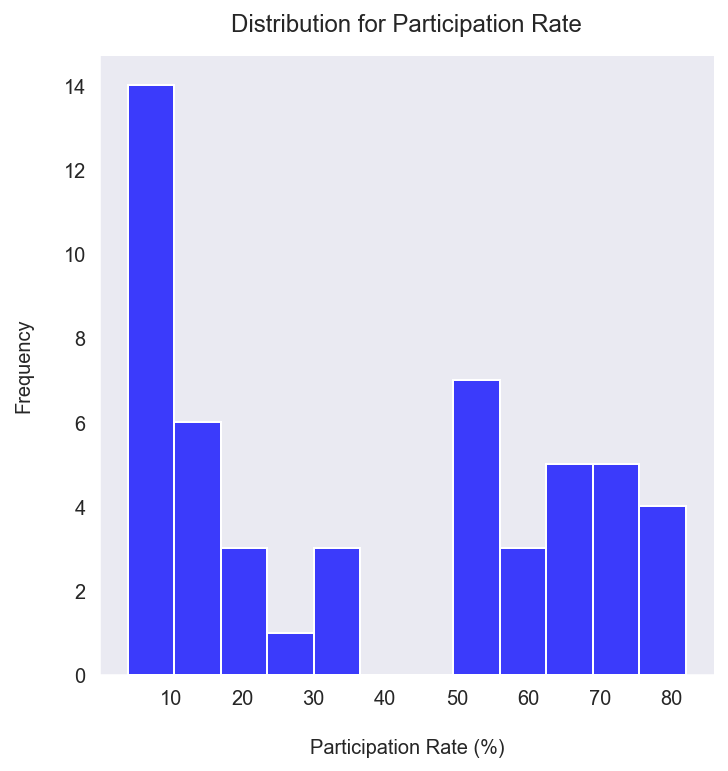

In [10]:
sns.set_style('dark')
sns.displot(df["Rate"], bins = 12,kde=False, color='b')
plt.xlabel('Participation Rate (%)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Participation Rate', y=1.02)
plt.show()

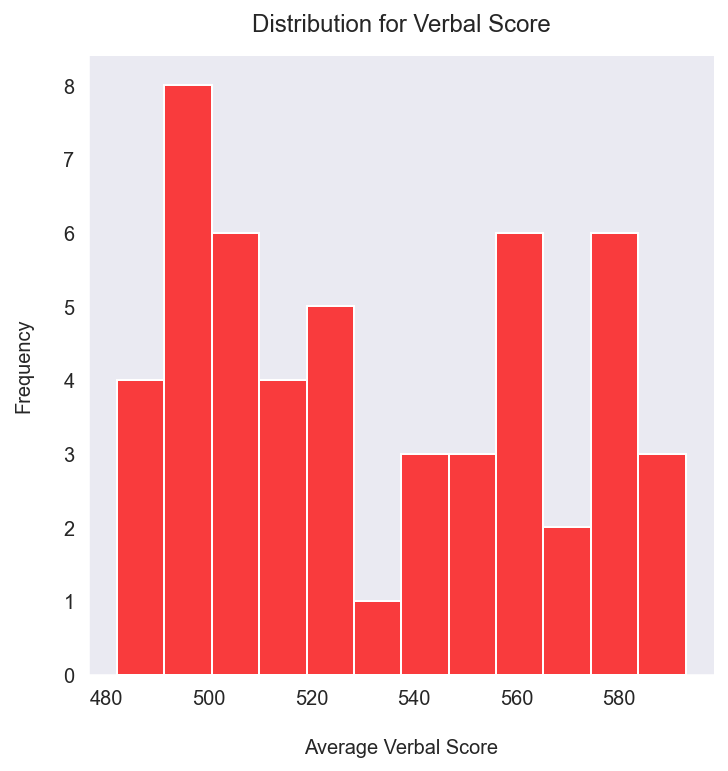

In [11]:
sns.displot(df["Verbal"], bins = 12,kde=False, color='r')
plt.xlabel('Average Verbal Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Verbal Score', y=1.02)
plt.show()

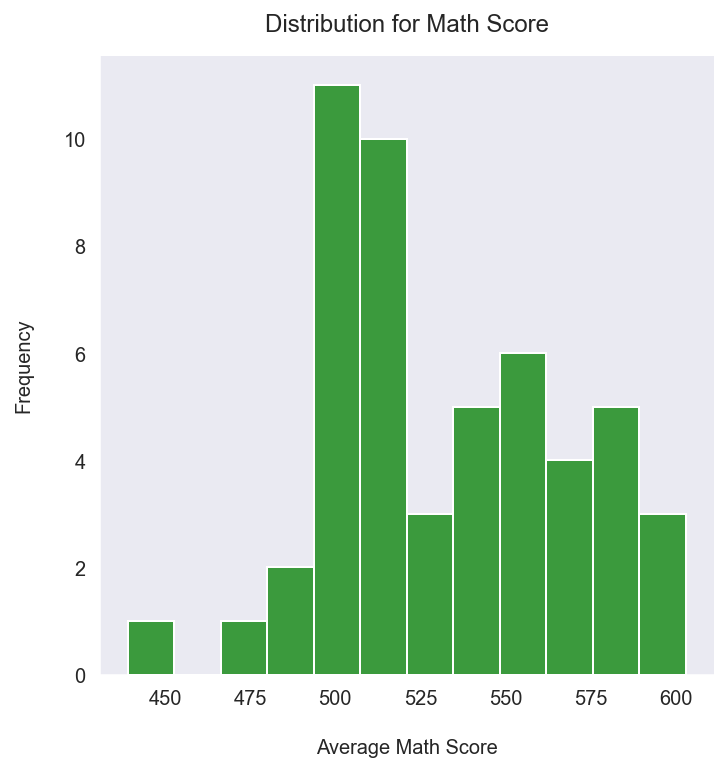

In [12]:
sns.displot(df["Math"], bins = 12,kde=False, color='g')
plt.xlabel('Average Math Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Math Score', y=1.02)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

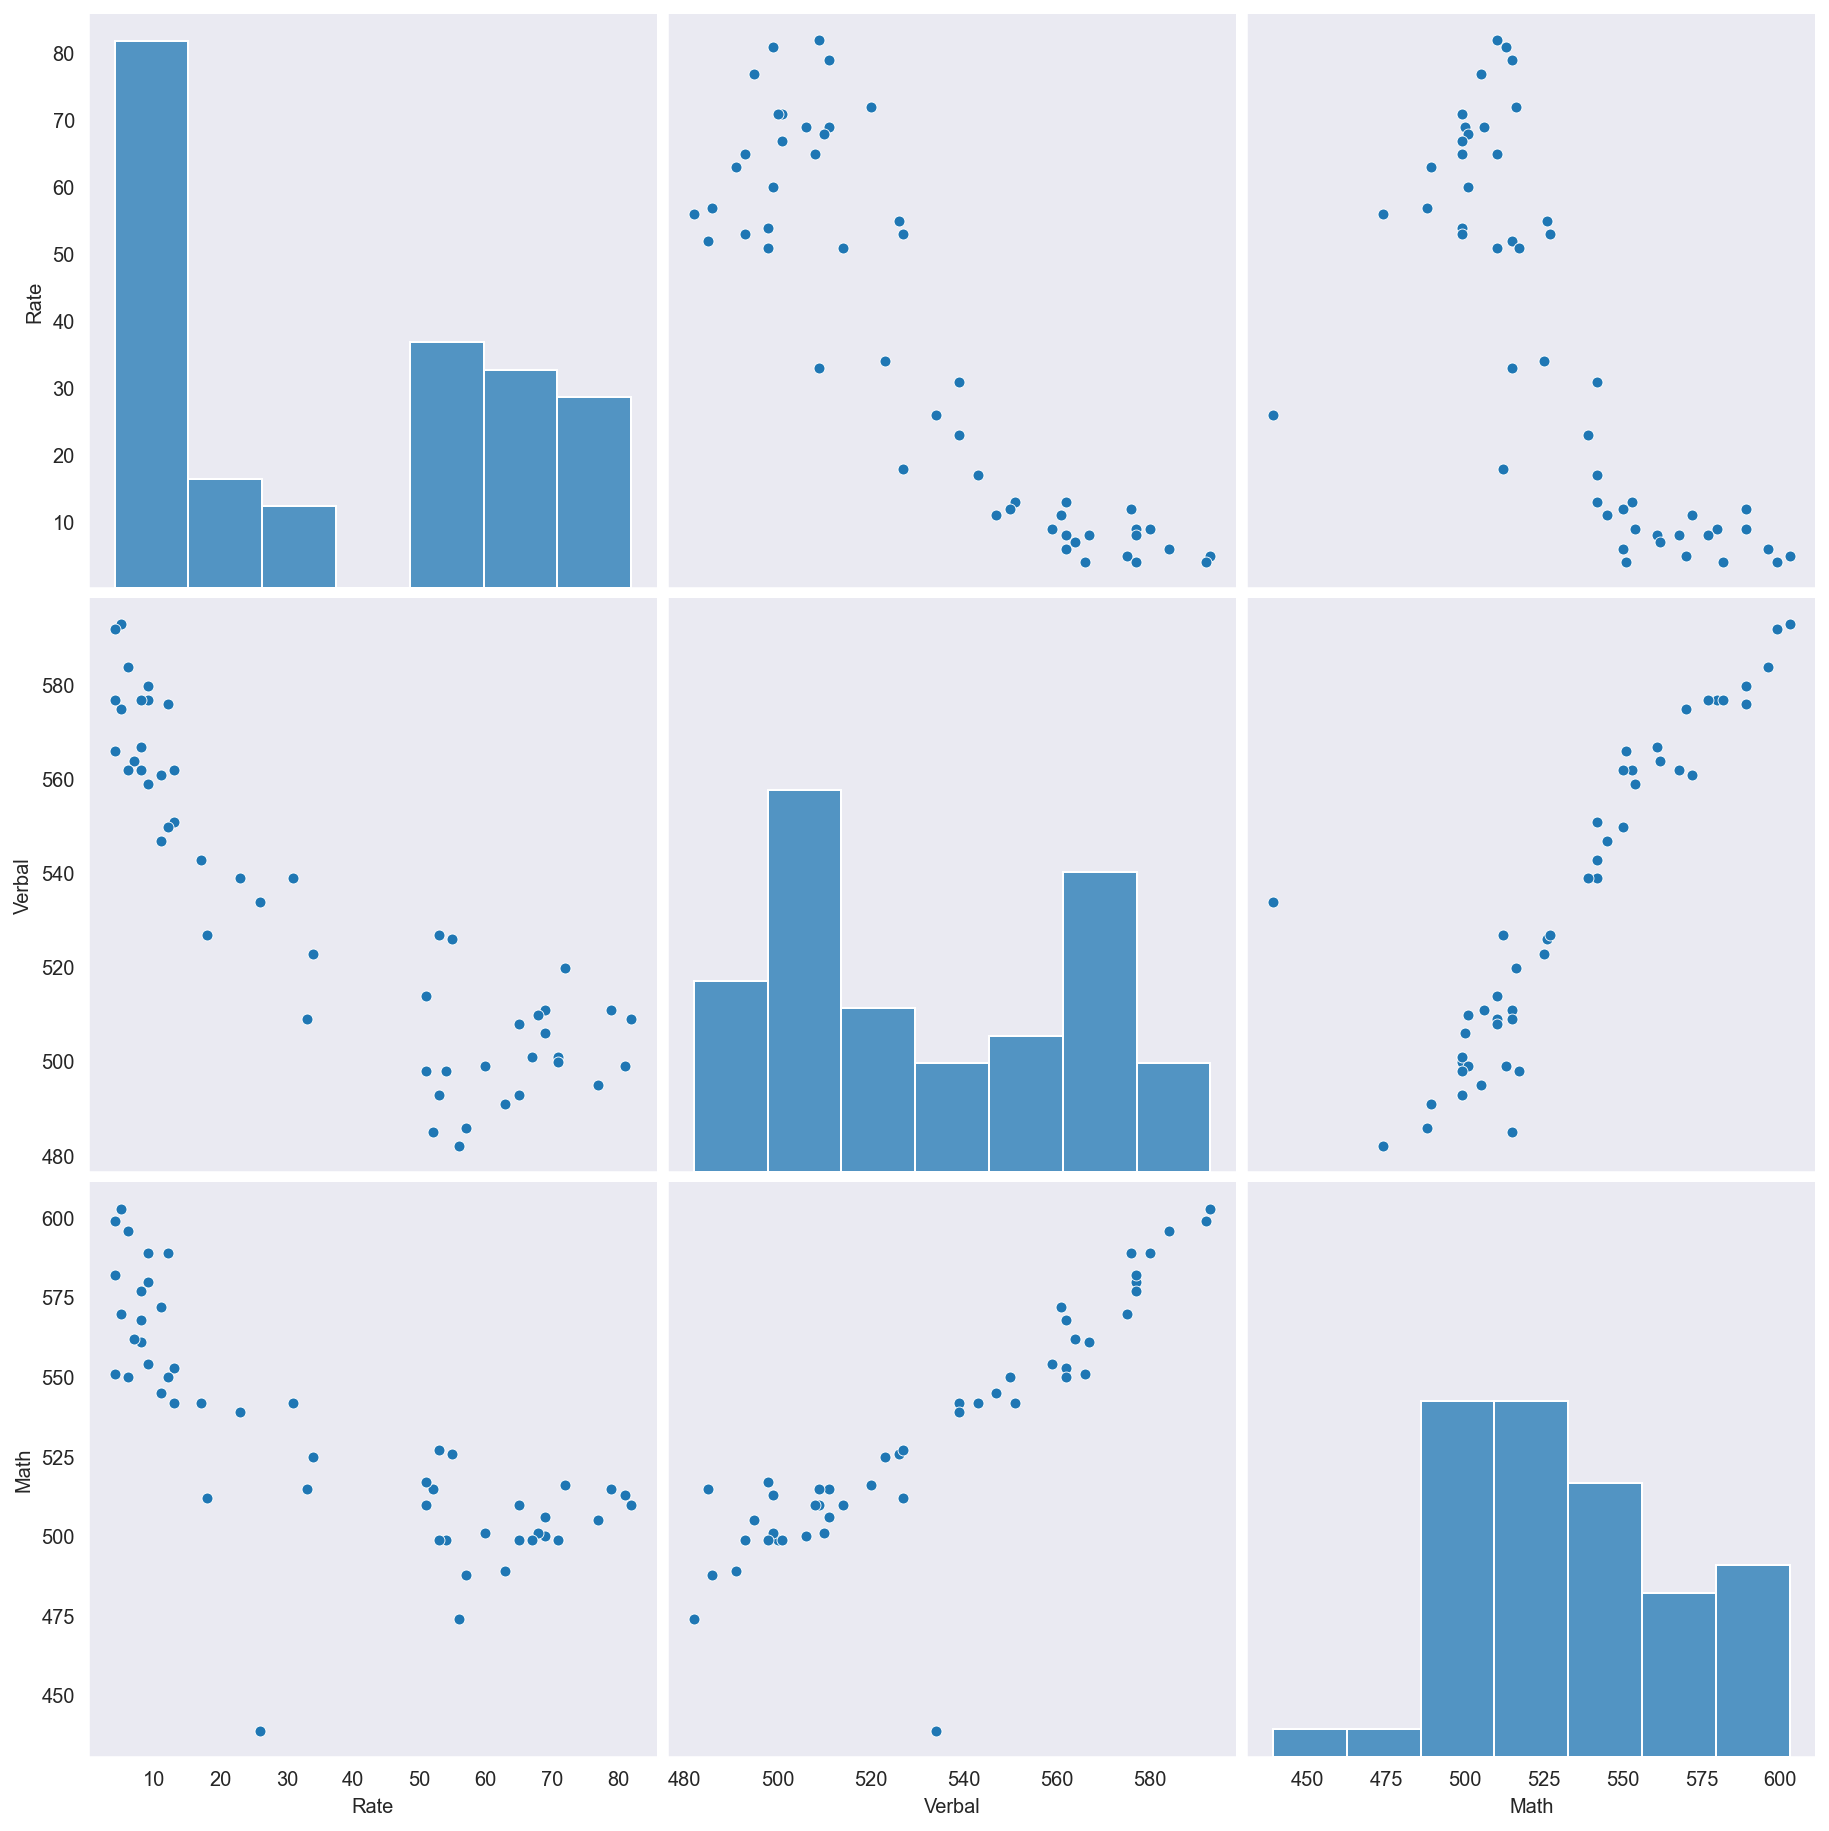

In [13]:
sns.pairplot(df, height=4.3, plot_kws=dict(s=30))
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 1.02, 'Stacked Histogram for Verbal and Math Score')

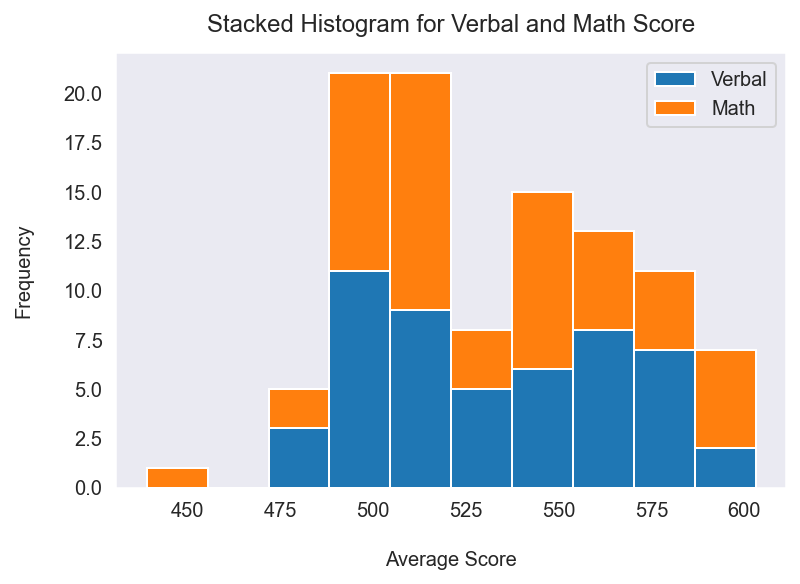

In [14]:
df[["Verbal", "Math"]].plot.hist(stacked=True)
plt.xlabel('Average Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Stacked Histogram for Verbal and Math Score', y=1.02)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Average Score')

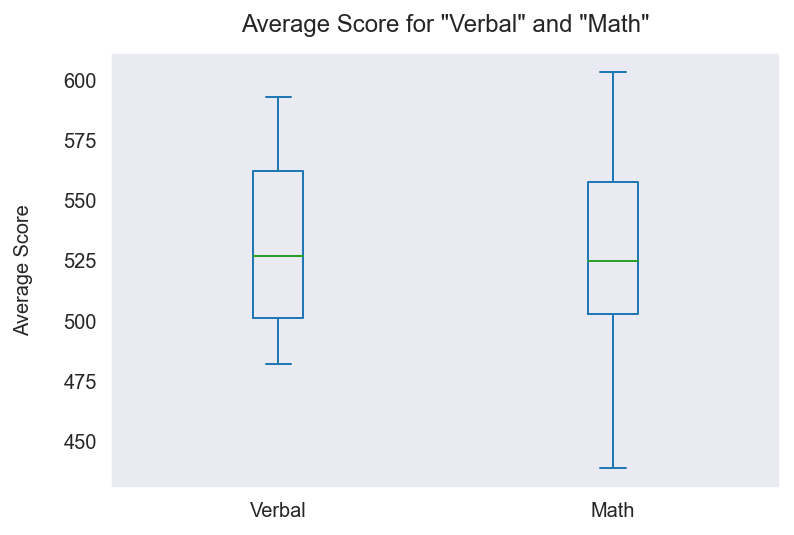

In [15]:
df[["Verbal", "Math"]].plot.box()
plt.title('Average Score for "Verbal" and "Math"', y=1.02)
plt.ylabel('Average Score', labelpad=15)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


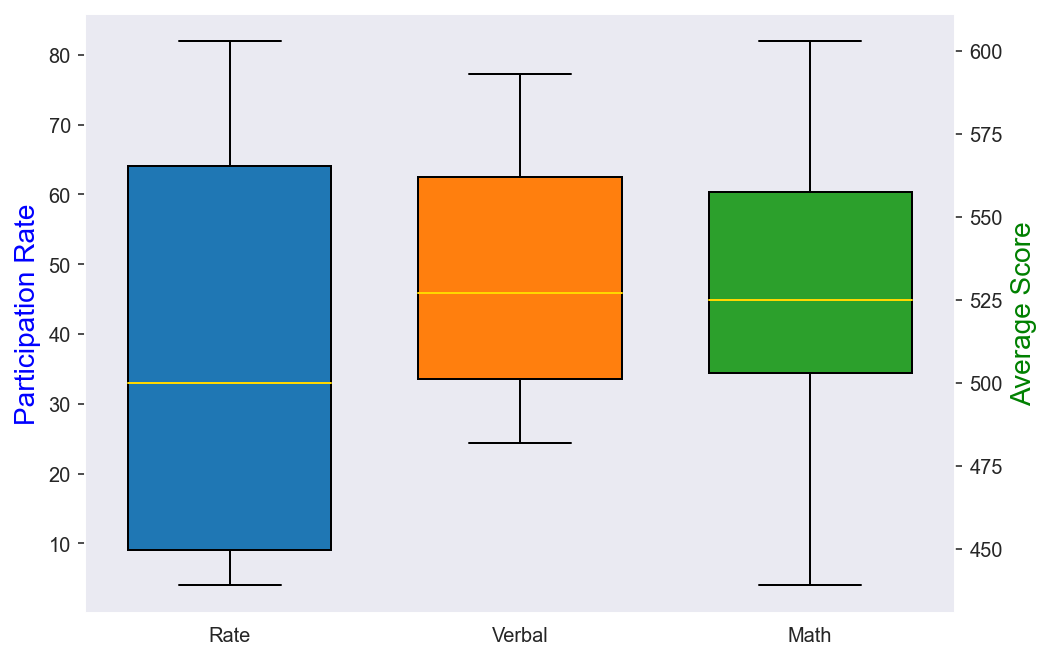

In [16]:
fig, ax1  = plt.subplots(figsize=(7.8, 5.51))

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="gold"))
box1=ax1.boxplot(df['Rate'].values, positions=[0], **props)
ax1.set_ylabel("Participation Rate",color="b",fontsize=14)

ax2 = ax1.twinx()
box2=ax2.boxplot(df[['Verbal','Math']].values,positions=[1,2], **props)
ax2.set_ylabel("Average Score",color="g",fontsize=14)
ax1.set_xlim(-0.5,2.5)
ax1.set_xticks(range(3))
ax1.set_xticklabels(['Rate','Verbal','Math'])

for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
verbal_mean = df[["Verbal"]].mean() #calculate mean

In [18]:
verbal_mean

Verbal    532.529412
dtype: float64

In [19]:
verbal_above_mean = df[df.Verbal > float(verbal_mean)] #filter by verbal score
verbal_above_mean

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [20]:
verbal_mean_list = verbal_above_mean['State'].tolist() #copy State column to list

In [21]:
verbal_mean_list

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [22]:
len(verbal_mean_list) #length of list

24

There are 24 data points higher than mean which is about half of our data.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
verbal_median = df[["Verbal"]].median() #calculate median

In [24]:
verbal_median

Verbal    527.0
dtype: float64

In [25]:
verbal_above_median = df[df.Verbal > float(verbal_median)] #filter by verbal score
verbal_above_median

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [26]:
verbal_median_list = verbal_above_median['State'].tolist() #copy State column to list

In [27]:
verbal_median_list

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [28]:
len(verbal_median_list)

24

We get exactly the same result as the mean of Verbal scores. This shows that the data has same mean and median and both located at center of the distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [29]:
df['Verbal - Math'] = df['Verbal']-df['Math']

In [30]:
df

State  Rate  Verbal  Math  Verbal - Math
0     CT    82     509   510             -1
1     NJ    81     499   513            -14
2     MA    79     511   515             -4
3     NY    77     495   505            -10
4     NH    72     520   516              4
5     RI    71     501   499              2
6     PA    71     500   499              1
7     VT    69     511   506              5
8     ME    69     506   500              6
9     VA    68     510   501              9
10    DE    67     501   499              2
11    MD    65     508   510             -2
12    NC    65     493   499             -6
13    GA    63     491   489              2
14    IN    60     499   501             -2
15    SC    57     486   488             -2
16    DC    56     482   474              8
17    OR    55     526   526              0
18    FL    54     498   499             -1
19    WA    53     527   527              0
20    TX    53     493   499             -6
21    HI    52     485   515            -30
22    AK    51     514   510              4
23    CA    51     498   517            -19
24    AZ    34     523   525             -2
25    NV    33     509   515             -6
26    CO    31     539   542             -3
27    OH    26     534   439             95
28    MT    23     539   539              0
29    WV    18     527   512             15
30    ID    17     543   542              1
31    TN    13     562   553              9
32    NM    13     551   542              9
33    IL    12     576   589            -13
34    KY    12     550   550              0
35    WY    11     547   545              2
36    MI    11     561   572            -11
37    MN     9     580   589             -9
38    KS     9     577   580             -3
39    AL     9     559   554              5
40    NE     8     562   568             -6
41    OK     8     567   561              6
42    MO     8     577   577              0
43    LA     7     564   562              2
44    WI     6     584   596            -12
45    AR     6     562   550             12
46    UT     5     575   570              5
47    IA     5     593   603            -10
48    SD     4     577   582             -5
49    ND     4     592   599             -7
50    MS     4     566   551             15

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
#sort by verbal-math and take top 10 and bottom 10 to separate datasets
#head(3) new datasets
df.sort_values(by=['Verbal - Math'], inplace=True)

In [32]:
df

State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14
33    IL    12     576   589            -13
44    WI     6     584   596            -12
36    MI    11     561   572            -11
3     NY    77     495   505            -10
47    IA     5     593   603            -10
37    MN     9     580   589             -9
49    ND     4     592   599             -7
40    NE     8     562   568             -6
20    TX    53     493   499             -6
12    NC    65     493   499             -6
25    NV    33     509   515             -6
48    SD     4     577   582             -5
2     MA    79     511   515             -4
38    KS     9     577   580             -3
26    CO    31     539   542             -3
11    MD    65     508   510             -2
14    IN    60     499   501             -2
15    SC    57     486   488             -2
24    AZ    34     523   525             -2
0     CT    82     509   510             -1
18    FL    54     498   499             -1
19    WA    53     527   527              0
17    OR    55     526   526              0
28    MT    23     539   539              0
42    MO     8     577   577              0
34    KY    12     550   550              0
6     PA    71     500   499              1
30    ID    17     543   542              1
5     RI    71     501   499              2
43    LA     7     564   562              2
35    WY    11     547   545              2
10    DE    67     501   499              2
13    GA    63     491   489              2
22    AK    51     514   510              4
4     NH    72     520   516              4
39    AL     9     559   554              5
7     VT    69     511   506              5
46    UT     5     575   570              5
8     ME    69     506   500              6
41    OK     8     567   561              6
16    DC    56     482   474              8
32    NM    13     551   542              9
9     VA    68     510   501              9
31    TN    13     562   553              9
45    AR     6     562   550             12
29    WV    18     527   512             15
50    MS     4     566   551             15
27    OH    26     534   439             95

In [33]:
verbal_greater = df.tail(10)
verbal_greater.sort_values(by=['Verbal - Math'], inplace=True, ascending=False)
verbal_greater

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
29    WV    18     527   512             15
50    MS     4     566   551             15
45    AR     6     562   550             12
32    NM    13     551   542              9
9     VA    68     510   501              9
31    TN    13     562   553              9
16    DC    56     482   474              8
8     ME    69     506   500              6
41    OK     8     567   561              6

In [34]:
math_greater = df.head(10)
math_greater

State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14
33    IL    12     576   589            -13
44    WI     6     584   596            -12
36    MI    11     561   572            -11
3     NY    77     495   505            -10
47    IA     5     593   603            -10
37    MN     9     580   589             -9
49    ND     4     592   599             -7

In [35]:
#then we print top 3 of each
verbal_greater.head(3)

State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
29    WV    18     527   512             15
50    MS     4     566   551             15

In [36]:
math_greater.head(3)

State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [37]:
df.corr()

Rate    Verbal      Math  Verbal - Math
Rate           1.000000 -0.888121 -0.773419      -0.098671
Verbal        -0.888121  1.000000  0.899909       0.044527
Math          -0.773419  0.899909  1.000000      -0.395574
Verbal - Math -0.098671  0.044527 -0.395574       1.000000

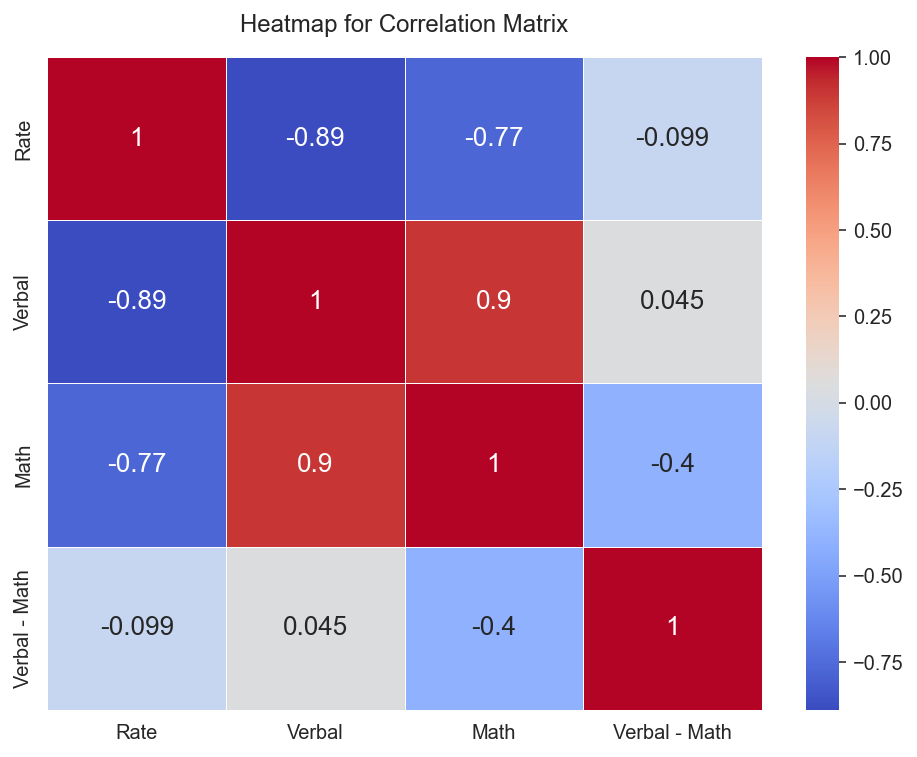

In [38]:
# Draw heatmap for correlation matrix.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), linewidths=.5, cmap='coolwarm', annot=True, annot_kws={"size": 13})
plt.title('Heatmap for Correlation Matrix', y=1.02)
plt.show()

There's strong correlation between rate, verbal and math.
* participation rate is inversely proportional with verbal and math scores
* verbal and math score are proportional with each other
* difference between verbal and math has very weak correlation with participation rate and verbal scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
df.describe()

Rate      Verbal        Math  Verbal - Math
count  51.000000   51.000000   51.000000      51.000000
mean   37.000000  532.529412  531.843137       0.686275
std    27.550681   33.360667   36.287393      15.839811
min     4.000000  482.000000  439.000000     -30.000000
25%     9.000000  501.000000  503.000000      -6.000000
50%    33.000000  527.000000  525.000000       0.000000
75%    64.000000  562.000000  557.500000       4.500000
max    82.000000  593.000000  603.000000      95.000000

* count: number of non-NA/null entries for the column.
* mean: average value of the column
* std: standard deviation of the column
* min: minimum value of the column
* 25%: 25th percentile or 1st quartile of the column
* 50%: 50th percentile or 2nd quartile or median of the column
* 75%: 75th percentile or 3rd quartile of the column
* max: maximum value of the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [40]:
df.cov()

Rate       Verbal         Math  Verbal - Math
Rate           759.04  -816.280000  -773.220000     -43.060000
Verbal        -816.28  1112.934118  1089.404706      23.529412
Math          -773.22  1089.404706  1316.774902    -227.370196
Verbal - Math  -43.06    23.529412  -227.370196     250.899608

* Correlation is a measure of direction and strength of linear relationship between two variables. Covariance only measures direction of the relationship. This means that higher numerical value of covariance does not indicate a stronger linear relationship. Instead, the sign is matters. A positive value indicates a positive linear relationship while a negative value indicates a negative relationship.
* Covariance result has no upper or lower bound while correlation is always between -1 and 1.
* Covariance is not standardised and is dependent on the scale of the variables while correlation is standardised and is independent of the scale of variables.

You can calculate correlation using covariance divided by the product of standard deviation of the two variables.

$Corr = \frac{Cov(x,y)}{s_xs_y}$

* Correlation tells the strength of relationship, covariance don't.
* Variables are standardised, making it independent on scale of variables which give us the information in one look.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [41]:
drug = pd.read_csv('drug-use-by-age.csv')
drug

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0                -  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2                -  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16               -  ...            0.0                   -               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 

In [42]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [43]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

These columns with object data types are worth examining, it likely filled with some strings

In [44]:
# Check all columns with dtypes == 'object'.
drug.select_dtypes(include=['object'])

age cocaine-frequency crack-frequency heroin-frequency  \
0      12               5.0               -             35.5   
1      13               1.0             3.0                -   
2      14               5.5               -              2.0   
3      15               4.0             9.5              1.0   
4      16               7.0             1.0             66.5   
5      17               5.0            21.0             64.0   
6      18               5.0            10.0             46.0   
7      19               5.5             2.0            180.0   
8      20               8.0             5.0             45.0   
9      21               5.0            17.0             30.0   
10  22-23               5.0             5.0             57.5   
11  24-25               6.0             6.0             88.0   
12  26-29               5.0             6.0             50.0   
13  30-34               8.0            15.0             66.0   
14  35-49              15.0            48.0            280.0   
15  50-64              36.0            62.0             41.0   
16    65+                 -               -            120.0   

   inhalant-frequency oxycontin-frequency meth-frequency  
0                19.0                24.5              -  
1                12.0                41.0            5.0  
2                 5.0                 4.5           24.0  
3                 5.5                 3.0           10.5  
4                 3.0                 4.0           36.0  
5                 4.0                 6.0           48.0  
6                 4.0                 7.0           12.0  
7                 3.0                 7.5          105.0  
8                 4.0                12.0           12.0  
9                 2.0                13.5            2.0  
10                4.0                17.5           46.0  
11                2.0                20.0           21.0  
12                4.0                13.5           30.0  
13                3.5                46.0           54.0  
14               10.0                12.0          104.0  
15               13.5                 5.0           30.0  
16                  -                   -              -

As we expected, there are incomplete data filled with '-'. We would drop these incomplete data.

In [45]:
# Drop the rows with str '-'
drug.drop(drug[drug.values == '-'].index, inplace=True)

# Convert Series to float.
drug.iloc[:, 2:] = drug.iloc[:, 2:].apply(pd.to_numeric)

drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [46]:
drug.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    13.000000    13.000000          13.000000      13.000000   
mean   3421.000000    66.346154          38.538462      23.638462   
std    1451.202892    17.610585          18.487002       9.229801   
min    2223.000000    29.200000           6.000000       7.300000   
25%    2469.000000    58.700000          24.000000      16.400000   
50%    2956.000000    69.700000          52.000000      24.900000   
75%    3923.000000    80.700000          52.000000      33.000000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            13.000000    13.000000          13.000000  13.000000   
mean             50.076923     2.823077           8.807692   0.384615   
std              13.002958     1.573295           8.644696   0.190815   
min              25.000000     0.500000           4.000000   0.000000   
25%              48.000000     1.500000           5.000000   0.400000   
50%              52.000000     3.200000           5.500000   0.500000   
75%              60.000000     4.100000           8.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use  ...  oxycontin-use  oxycontin-frequency  \
count        13.000000   13.000000  ...      13.000000            13.000000   
mean         15.961538    0.446154  ...       1.176923            12.846154   
std          18.502772    0.328165  ...       0.465750            11.257191   
min           1.000000    0.100000  ...       0.300000             3.000000   
25%           5.000000    0.100000  ...       0.900000             6.000000   
50%           9.500000    0.400000  ...       1.300000            12.000000   
75%          17.000000    0.600000  ...       1.500000            13.500000   
max          62.000000    1.100000  ...       1.700000            46.000000   

       tranquilizer-use  tranquilizer-frequency  stimulant-use  \
count         13.000000               13.000000      13.000000   
mean           3.546154                8.615385       2.407692   
std            1.244063                2.623244       1.227777   
min            1.400000                4.500000       0.300000   
25%            2.400000                7.000000       1.500000   
50%            3.900000               10.000000       2.600000   
75%            4.300000               10.000000       3.300000   
max            5.400000               12.000000       4.100000   

       stimulant-frequency   meth-use  meth-frequency  sedative-use  \
count            13.000000  13.000000       13.000000     13.000000   
mean             11.346154   0.484615       39.269231      0.330769   
std               5.935011   0.207550       33.001651      0.110940   
min               6.000000   0.200000        2.000000      0.200000   
25%               8.000000   0.300000       12.000000      0.200000   
50%              10.000000   0.500000       30.000000      0.300000   
75%              12.000000   0.600000       48.000000      0.400000   
max              24.000000   0.900000      105.000000      0.500000   

       sedative-frequency  
count           13.000000  
mean            20.461538  
std             28.553649  
min              3.000000  
25%              6.000000  
50%             10.000000  
75%             17.500000  
max            104.000000  

[8 rows x 27 columns]

In [56]:
# Seperate the dataset into two subsets.
drug_use = drug.iloc[:, ::2]
drug_freq = drug.drop('n', axis=1).iloc[:, ::2]

# Rename the columns.
drug_use.rename(columns=lambda x: x.split('-')[0], inplace=True)
drug_freq.rename(columns=lambda x: x.split('-')[0], inplace=True)

C:\Users\fullb\AppData\Local\Temp/ipykernel_40648/2917006283.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug_use.mean().sort_values().plot(kind='barh', figsize=(9,7))


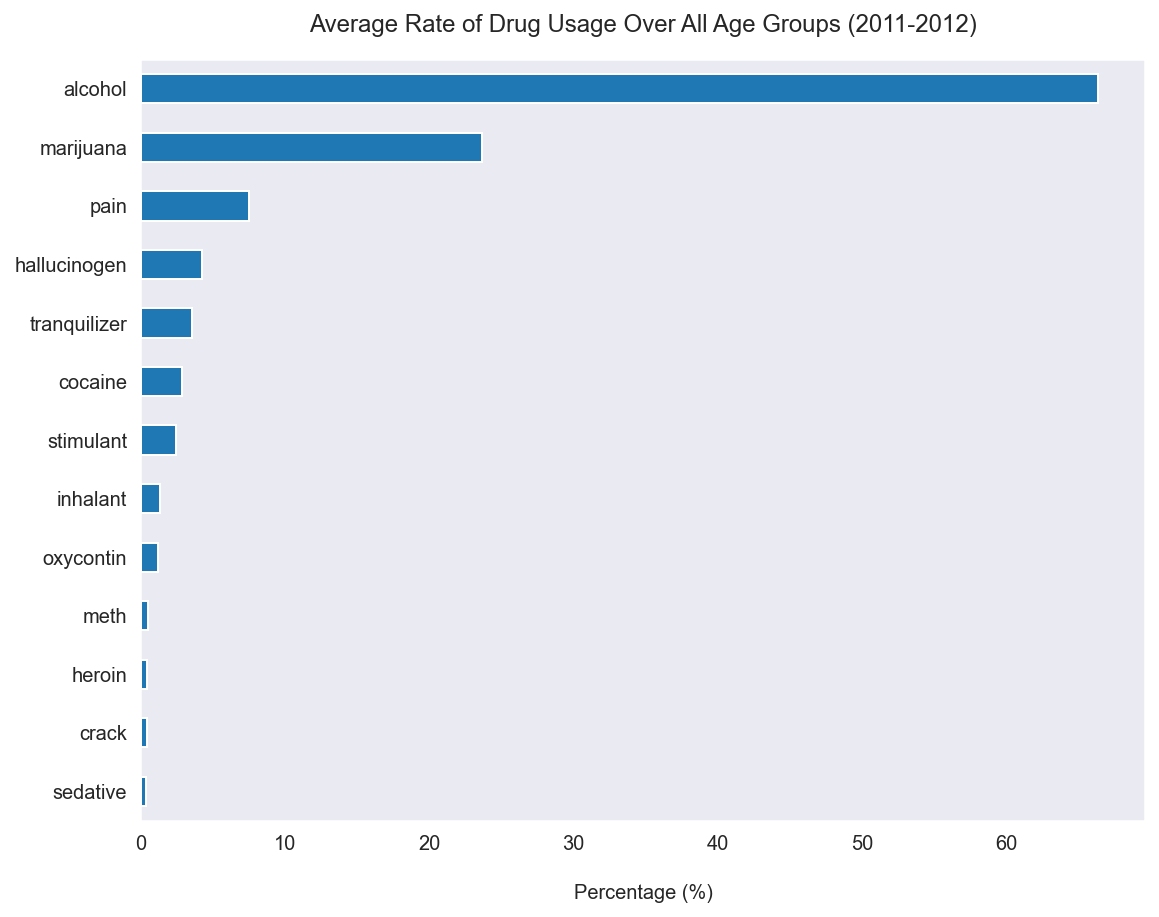

In [57]:
drug_use.mean().sort_values().plot(kind='barh', figsize=(9,7))
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Average Rate of Drug Usage Over All Age Groups (2011-2012)', y=1.02)
plt.show()

C:\Users\fullb\AppData\Local\Temp/ipykernel_40648/958423035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug_freq.mean().sort_values().plot(kind='barh', figsize=(9,7))


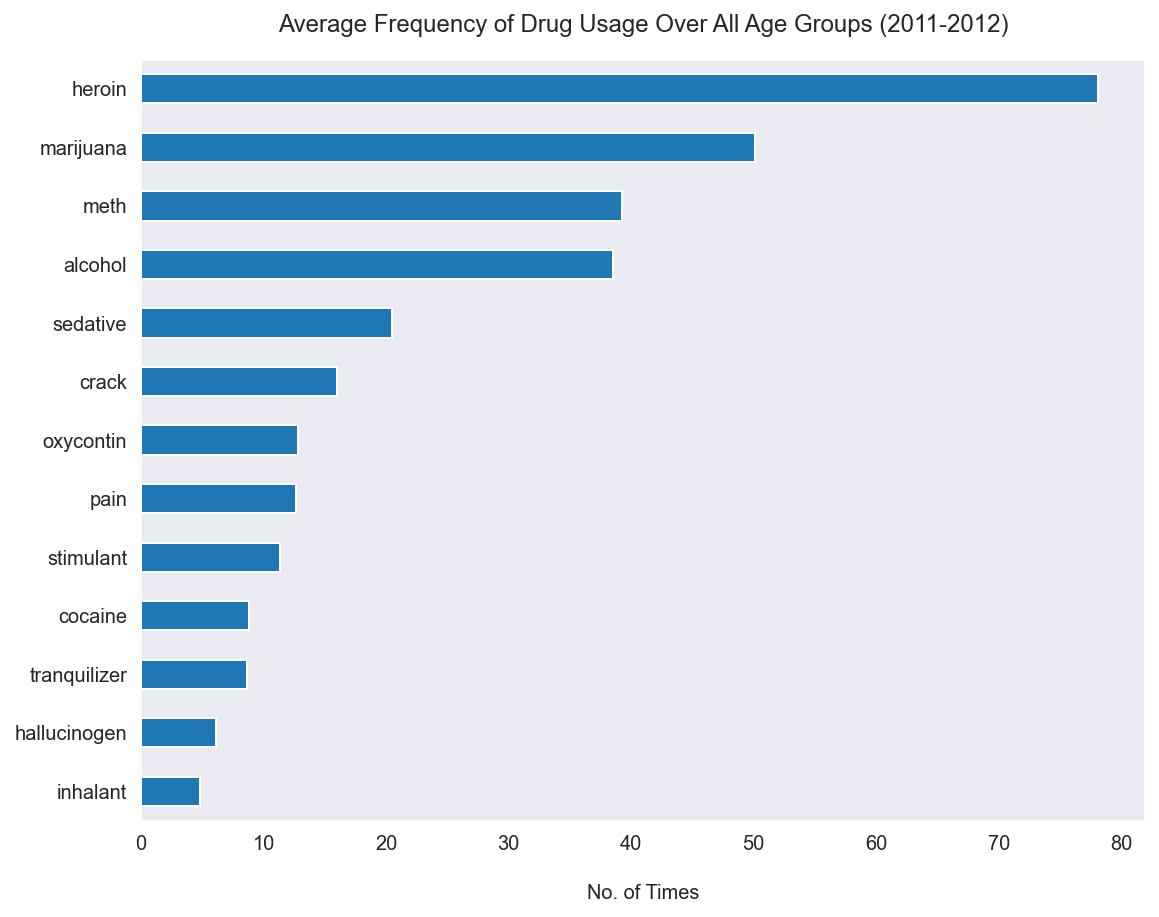

In [58]:
drug_freq.mean().sort_values().plot(kind='barh', figsize=(9,7))
plt.xlabel('No. of Times', labelpad=15)
plt.title('Average Frequency of Drug Usage Over All Age Groups (2011-2012)', y=1.02)
plt.show()

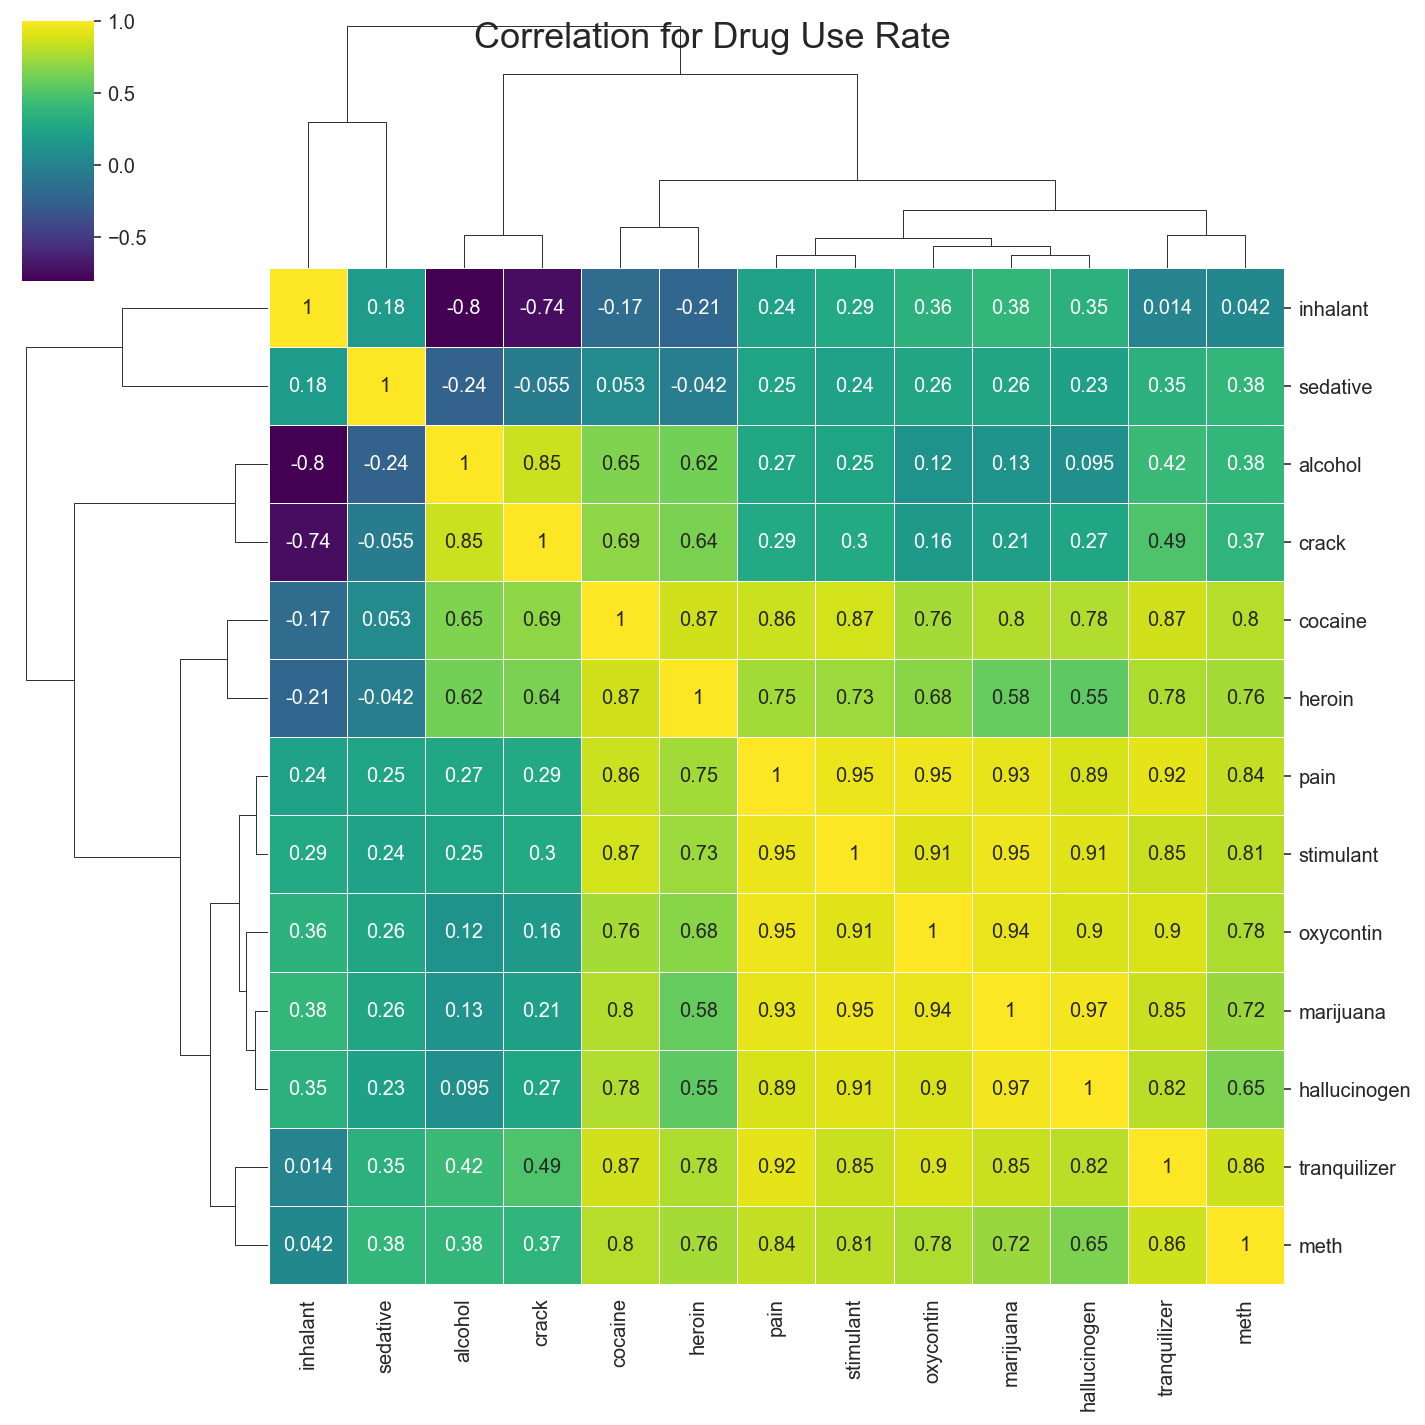

In [59]:
sns.clustermap(drug_use.corr(), cmap='viridis', linewidths=.5, annot=True)\
    .fig.suptitle('Correlation for Drug Use Rate', fontsize=18) 
plt.show()

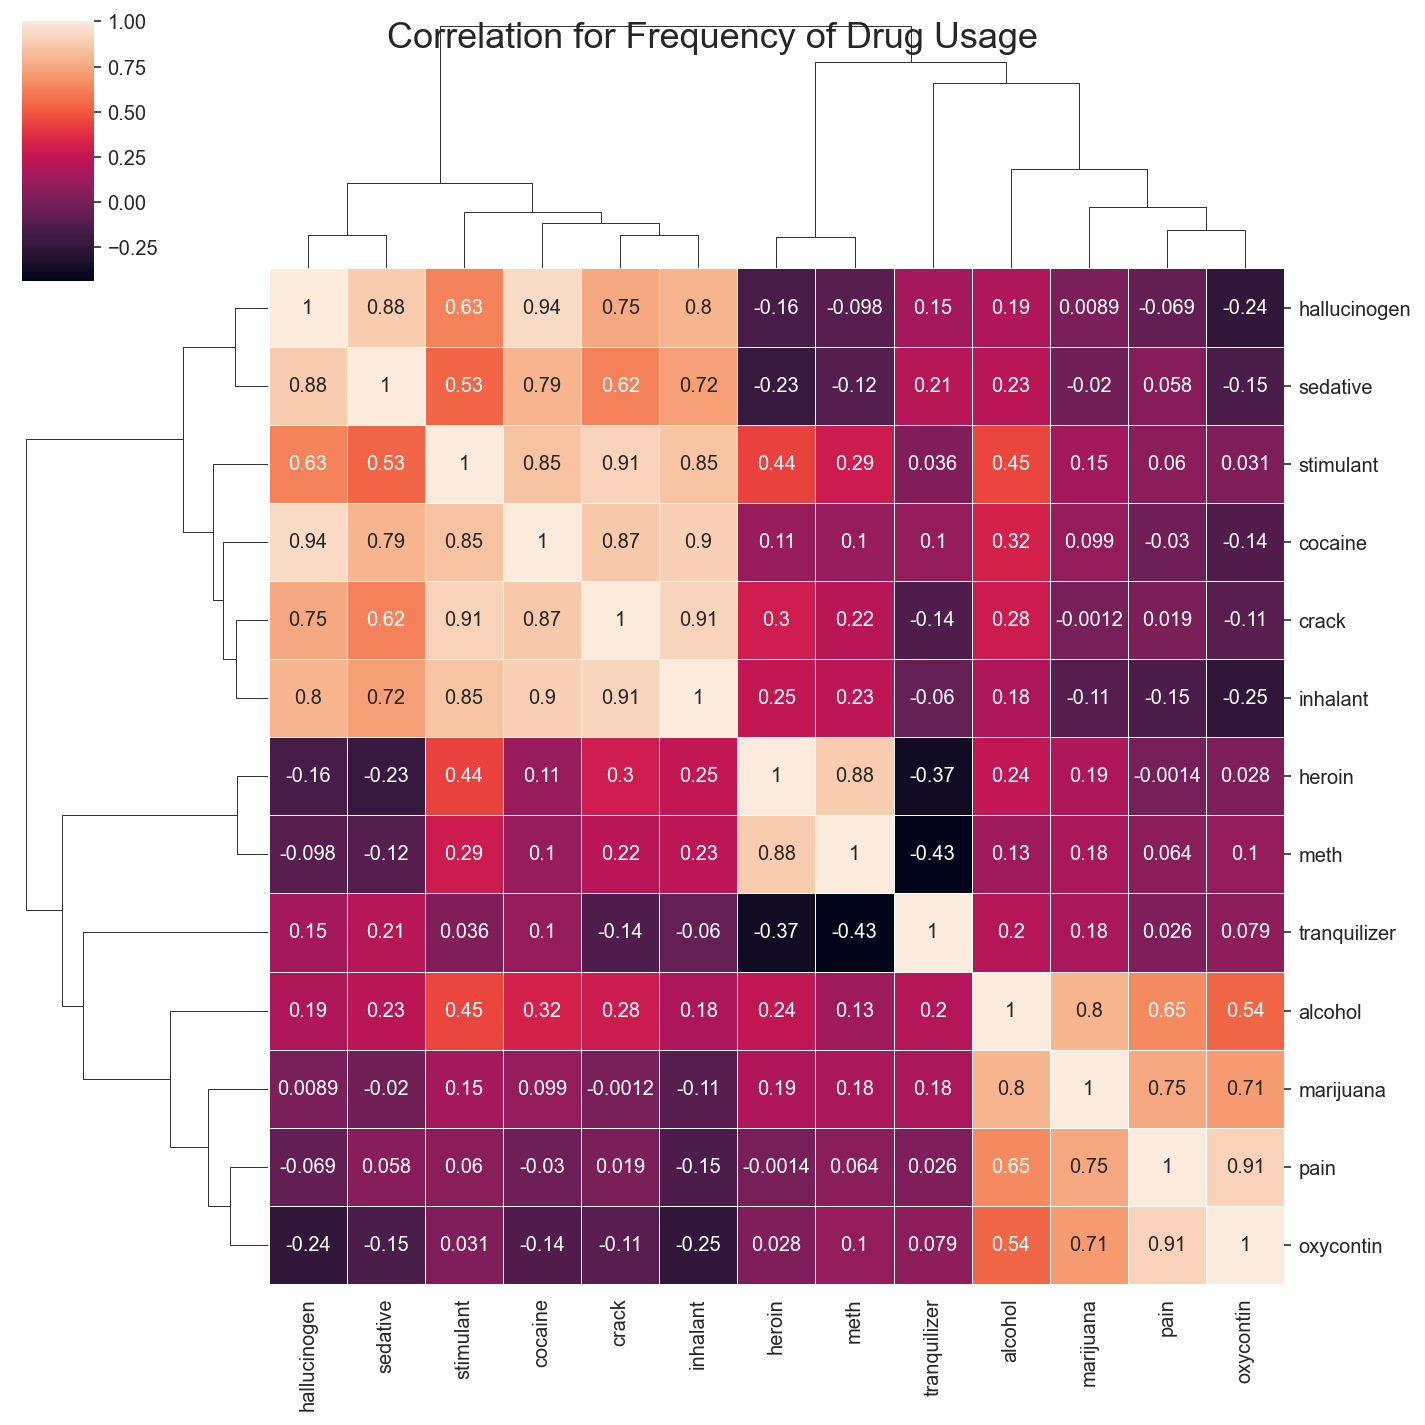

In [60]:
sns.clustermap(drug_freq.corr(), cmap='rocket', linewidths=.5, annot=True)\
    .fig.suptitle('Correlation for Frequency of Drug Usage', fontsize=18) 
plt.show()

C:\Users\fullb\AppData\Local\Temp/ipykernel_40648/2077668427.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug_use['average'] = drug_use.mean(axis=1)


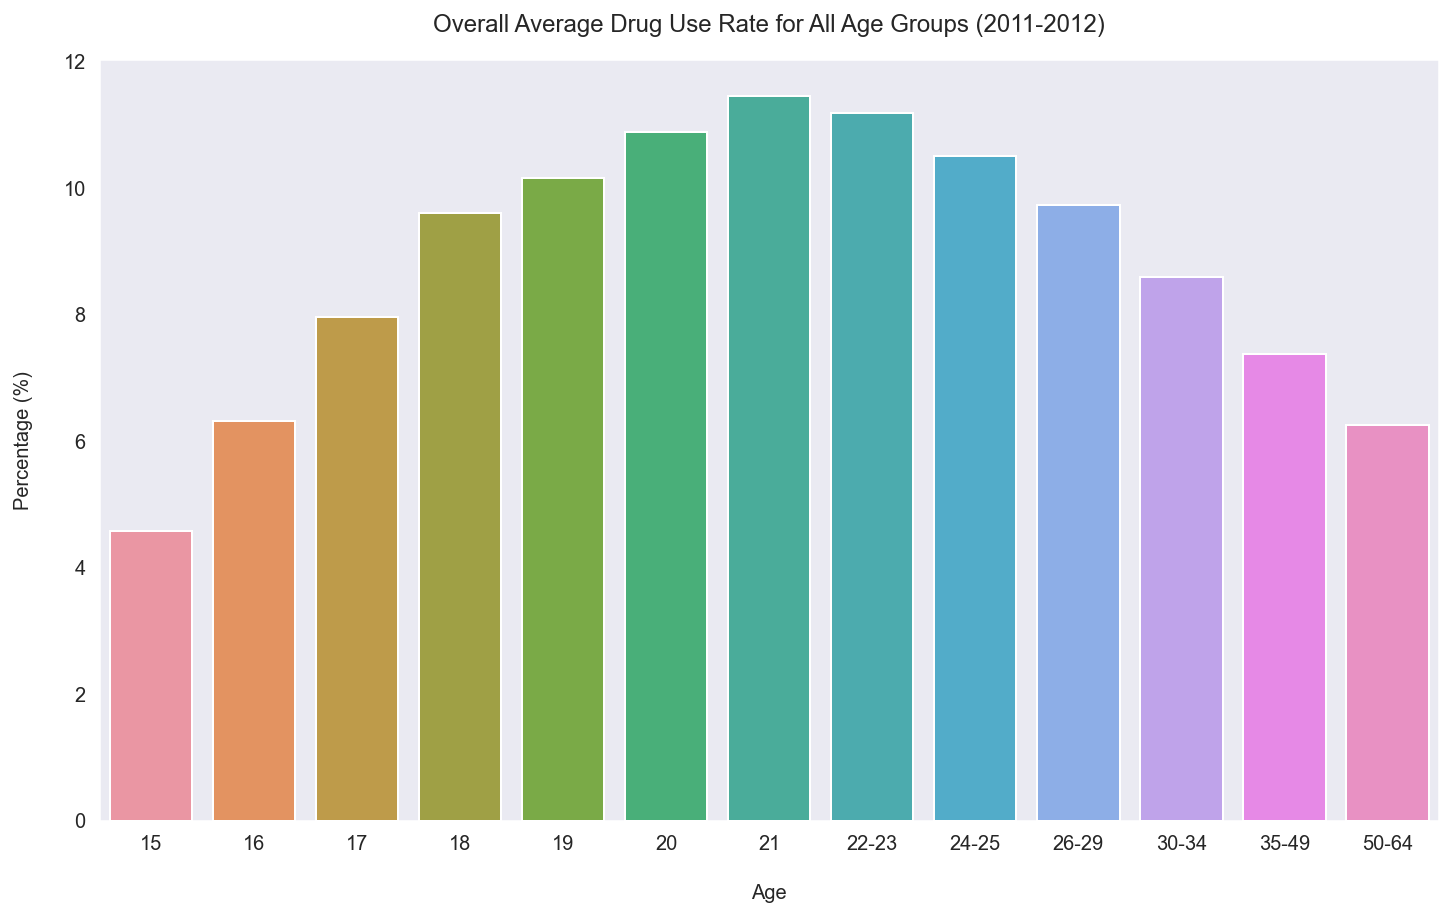

In [61]:
# Calculate average drug use rate for each age group.
drug_use['average'] = drug_use.mean(axis=1)

plt.figure(figsize=(12,7))
sns.barplot(x='age', y='average', data=drug_use)
plt.xlabel('Age', labelpad=15)
plt.ylabel('Percentage (%)', labelpad=15)
plt.title('Overall Average Drug Use Rate for All Age Groups (2011-2012)', y=1.02)
plt.show()

C:\Users\fullb\AppData\Local\Temp/ipykernel_40648/2500324598.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug_freq['average'] = drug_freq.mean(axis=1)


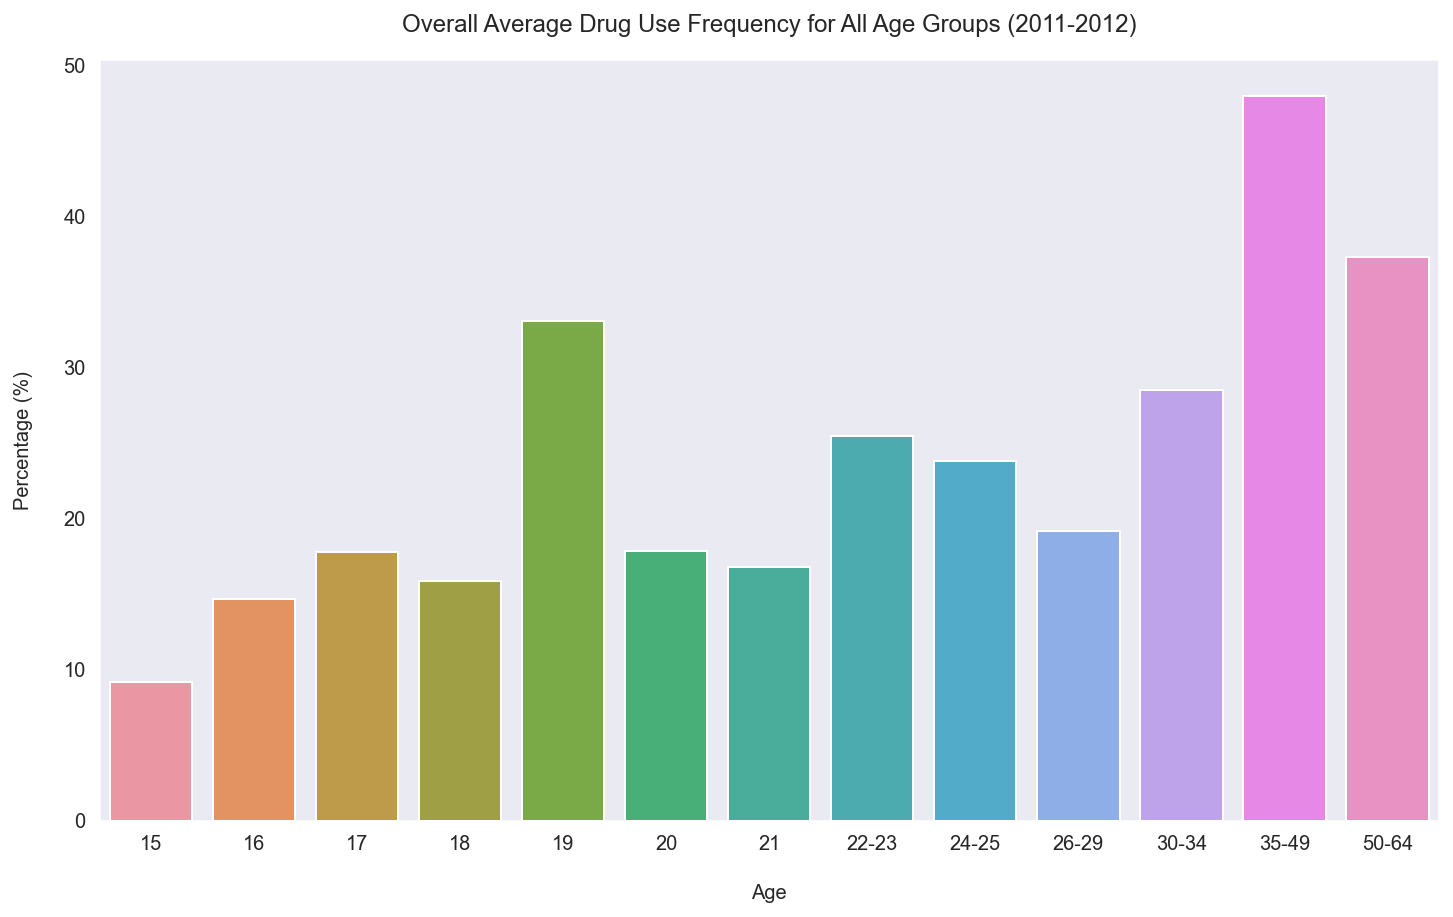

In [62]:
# Calculate average drug use frequency for each age group.
drug_freq['average'] = drug_freq.mean(axis=1)

plt.figure(figsize=(12,7))
sns.barplot(x='age', y='average', data=drug_freq)
plt.xlabel('Age', labelpad=15)
plt.ylabel('Percentage (%)', labelpad=15)
plt.title('Overall Average Drug Use Frequency for All Age Groups (2011-2012)', y=1.02)
plt.show()

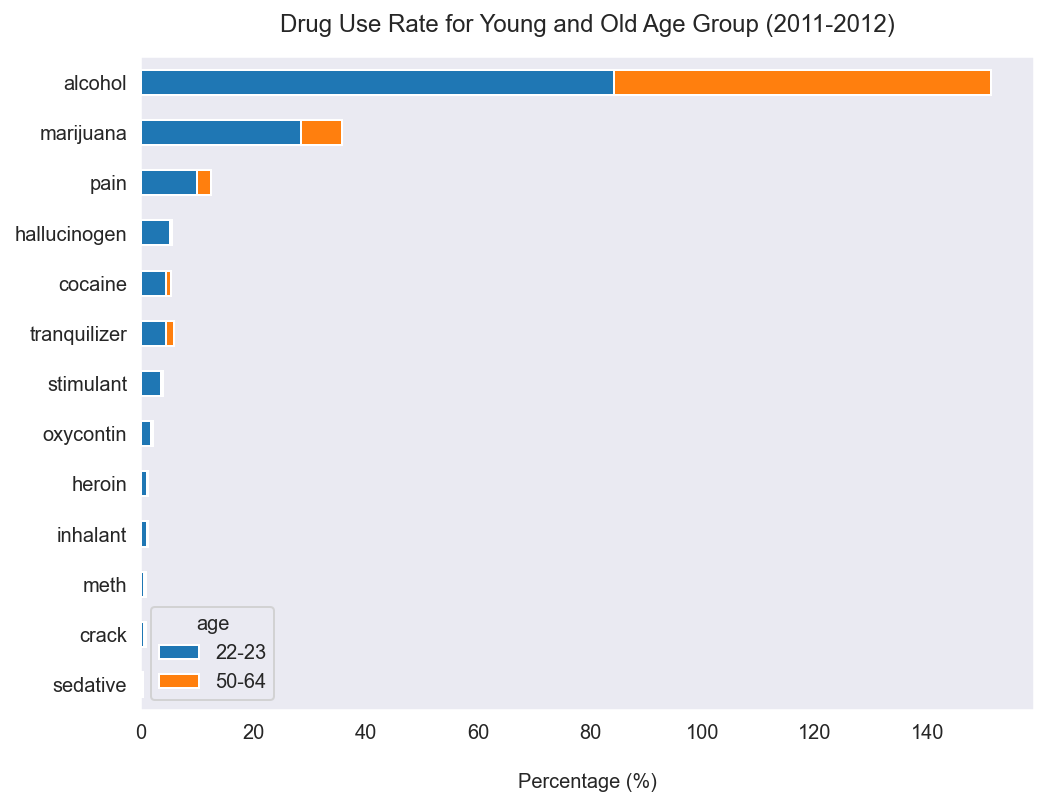

In [63]:
# Set index.
drug_use.set_index('age', inplace=True)
drug_freq.set_index('age', inplace=True)
drug_use.iloc[[7,12], 0:-1].T.sort_values('22-23').plot(kind='barh', figsize=(8,6), stacked=True)
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Drug Use Rate for Young and Old Age Group (2011-2012)', y=1.02)
plt.show()

It's probably wise to exclude alcohol to have clearer picture of this data

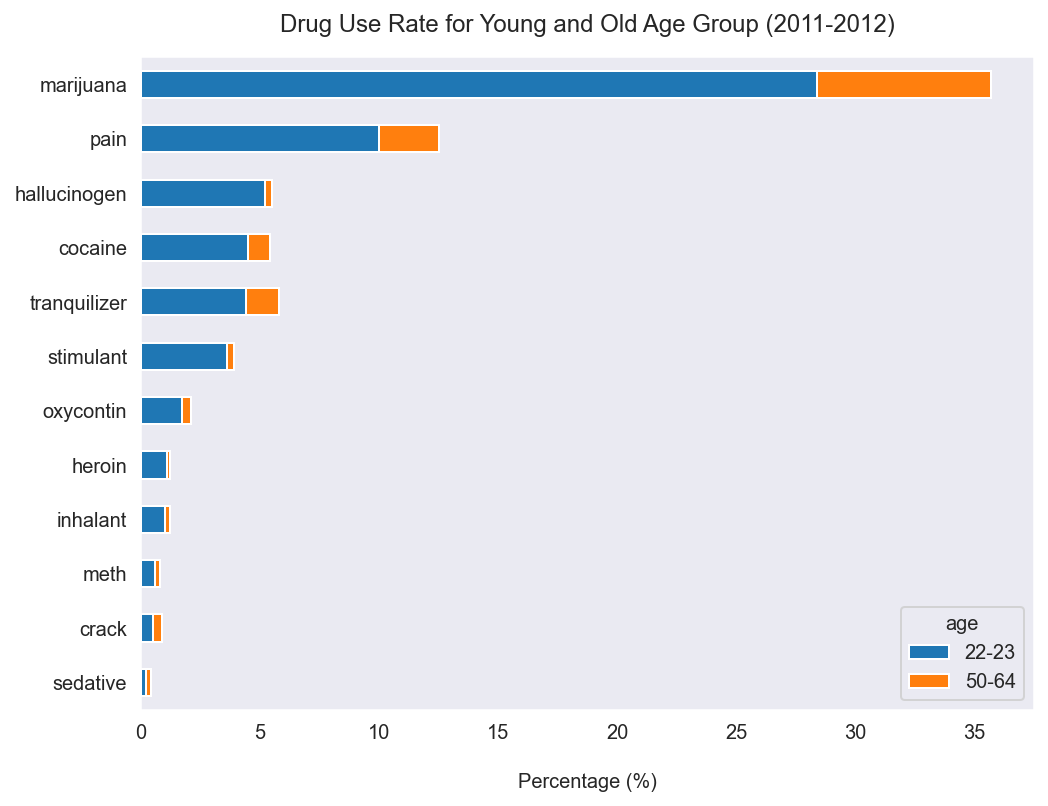

In [75]:
# Excluding alcohol.
drug_use.iloc[[7,12], 1:-1].T.sort_values('22-23').plot(kind='barh', figsize=(8,6), stacked=True)
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Drug Use Rate for Young and Old Age Group (2011-2012)', y=1.02)
plt.show()

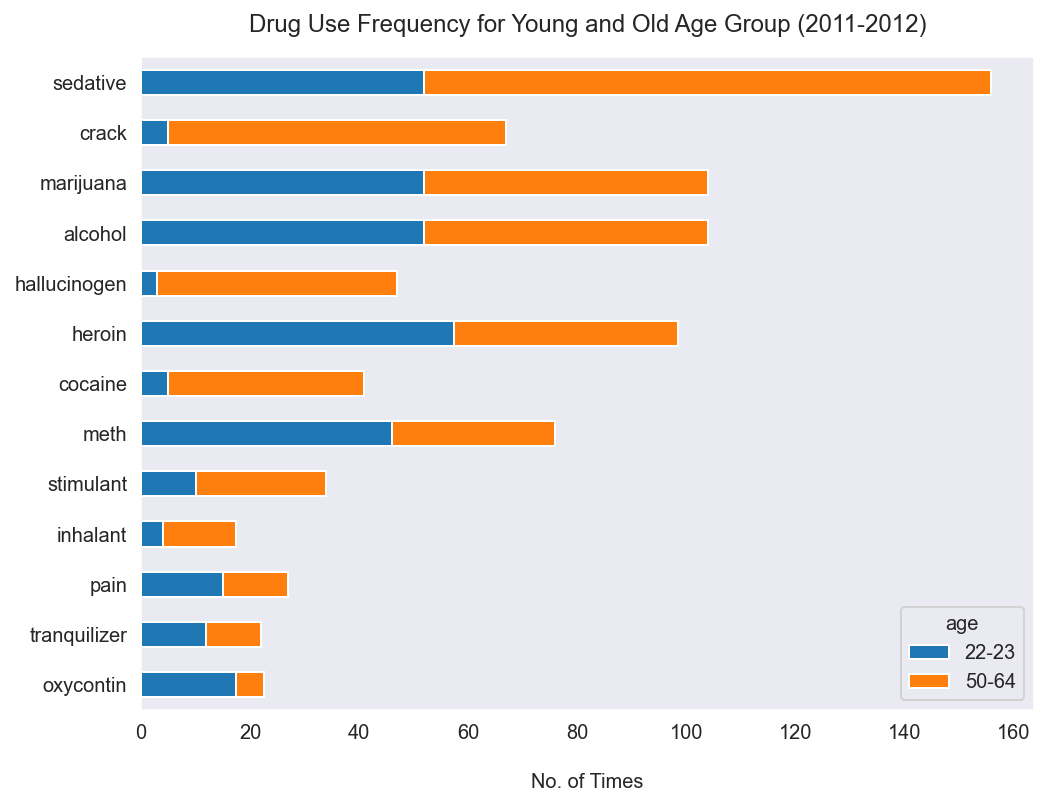

In [65]:
drug_freq.iloc[[7,12], 0:-1].T.sort_values('50-64').plot(kind='barh', figsize=(8,6), stacked=True)
plt.xlabel('No. of Times', labelpad=15)
plt.title('Drug Use Frequency for Young and Old Age Group (2011-2012)', y=1.02)
plt.show()

In [66]:
# Create function to plot figures.
def plot(col1, col2, name):
    """Plot percentage and frequency of drug usage for same drug type.
    
    Args:
        col1 (str): Column name representing the % of drug use.
        col2 (str): Column representing frequency of drug use.
        name (str): Name of the drug in title case.

    Returns:
        Primary axis showing percentage of drug use.
        Secondary axis showing frequency of drug use.
        
    """
    # Plot two axes on the same graph.
    fig = plt.figure(figsize=(12,7))
    ax1 = fig.gca()
    ax1 = sns.barplot(x='age', y=col1, data=drug, ax=ax1,
                      color='#3498f9', label='% Use')
    ax2 = plt.twinx()
    sns.lineplot(x='age', y=col2, data=drug, ax=ax2, 
                 color='r', marker='s', lw=3, label='No. of Times')
    
    # Group the two legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize=16)

    # Set XY labels and title.
    ax1.set_xlabel('Age', fontsize=16, labelpad=15)
    ax1.set_ylabel('Percentage (%)', color='#3498f9', fontsize=16, labelpad=15)
    ax2.set_ylabel('No. of Times', color='red', fontsize=16, labelpad=15)
    plt.title('{} Usage Over All Age Groups (2011-2012)'.format(name), y=1.02)
    
    # Set yticks label color.
    for label in ax1.get_yticklabels():
        label.set_color("#3498f9")
    for label in ax2.get_yticklabels():
        label.set_color("red")

    return plt.show()

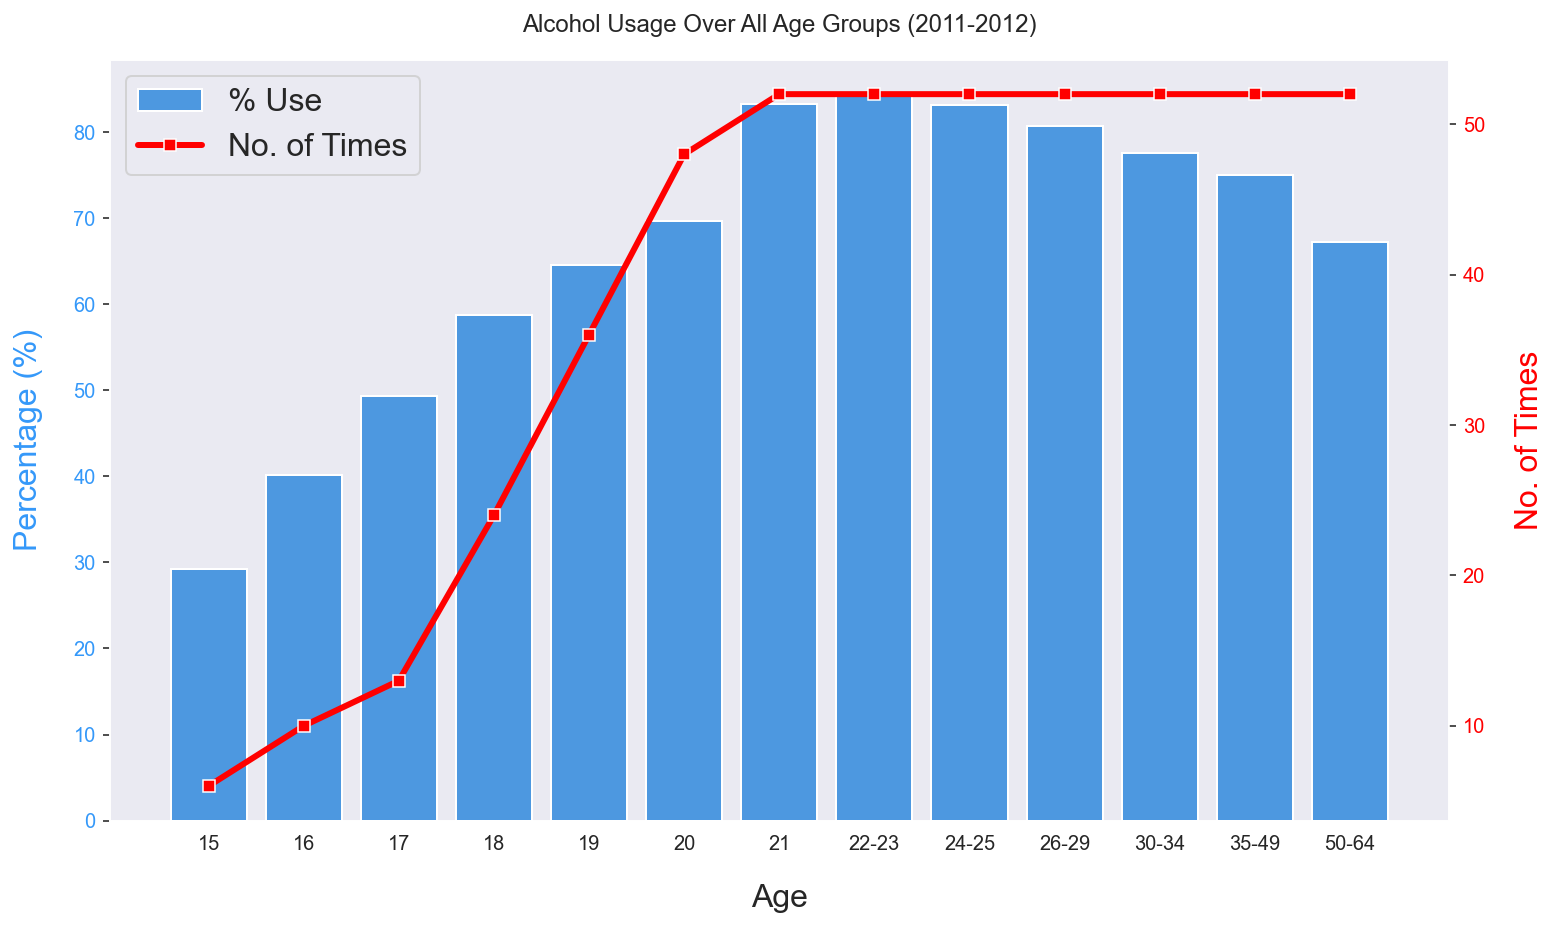

In [67]:
plot('alcohol-use', 'alcohol-frequency', 'Alcohol')

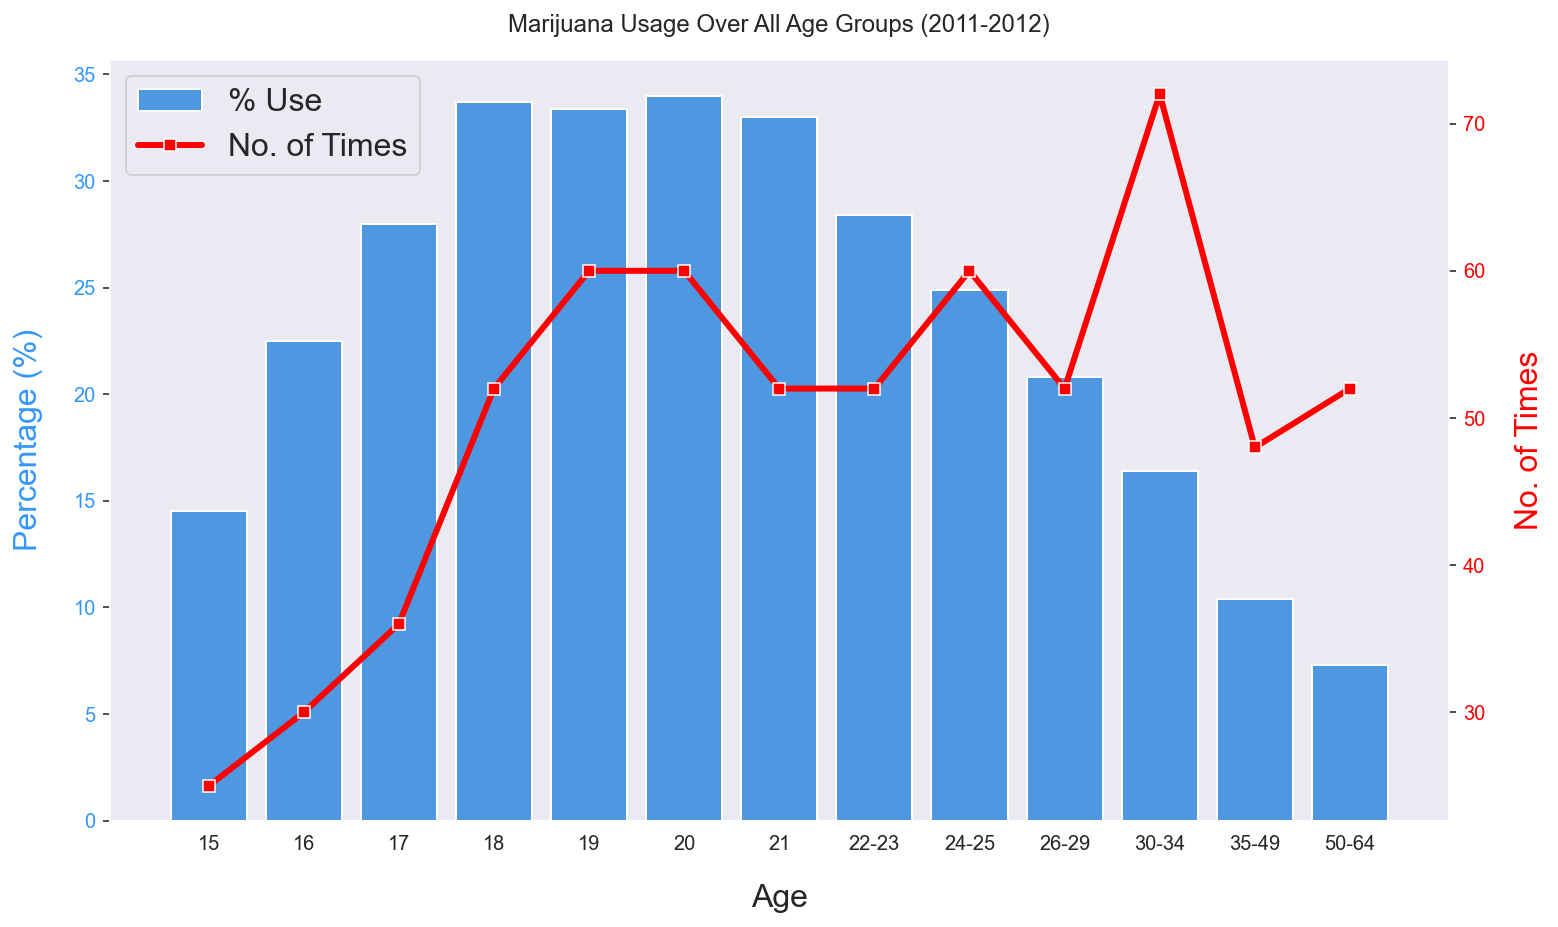

In [68]:
plot('marijuana-use', 'marijuana-frequency', 'Marijuana')

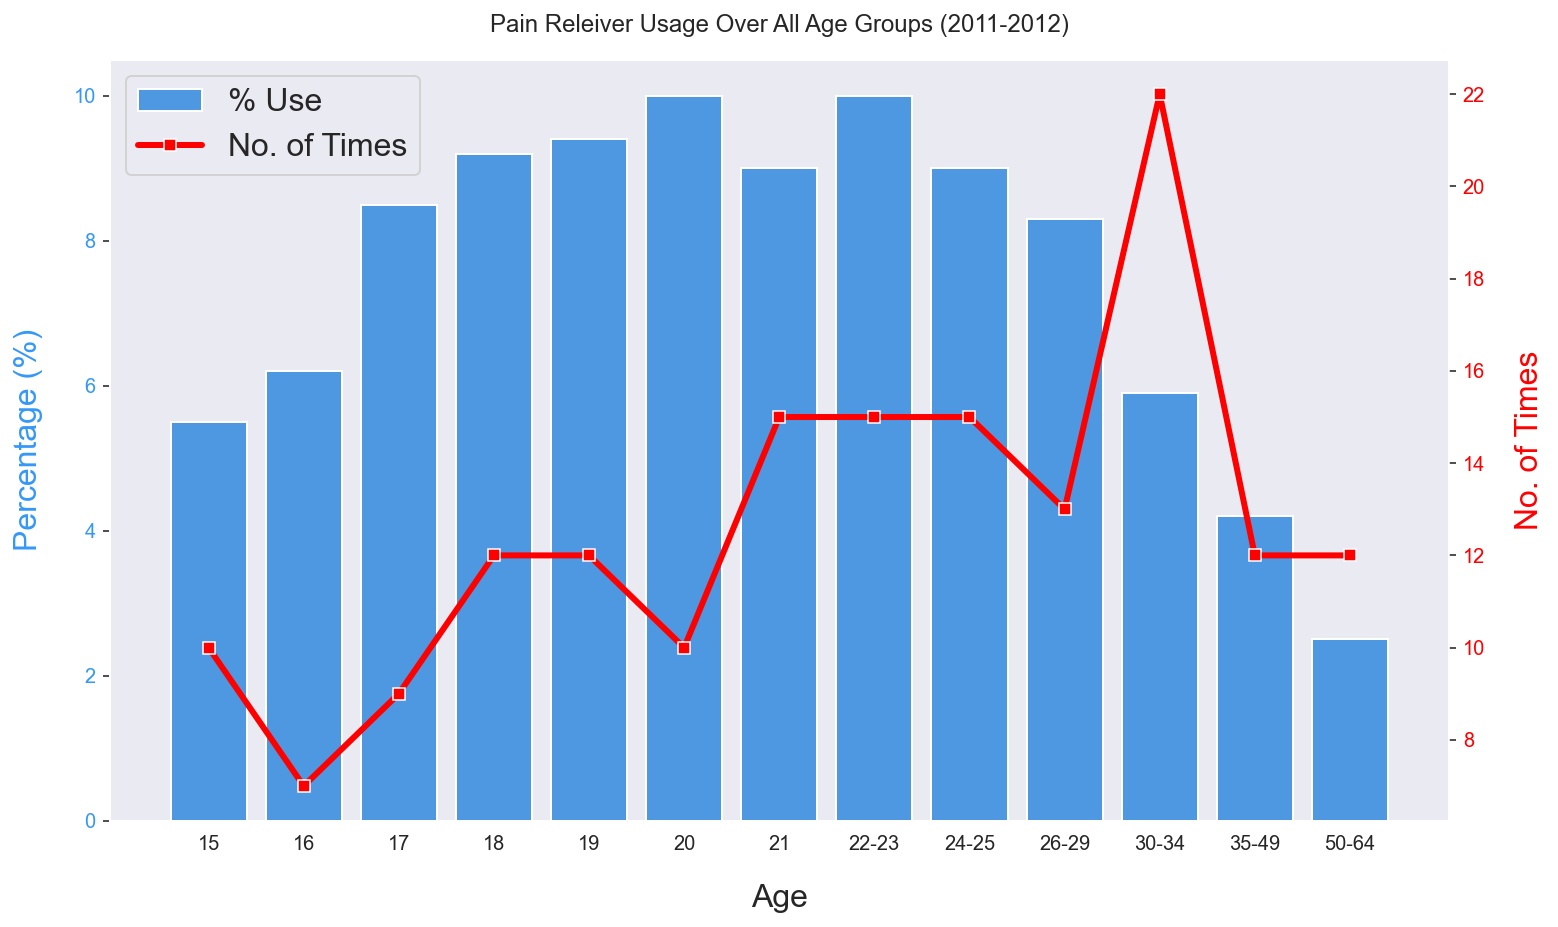

In [69]:
plot('pain-releiver-use', 'pain-releiver-frequency', 'Pain Releiver')

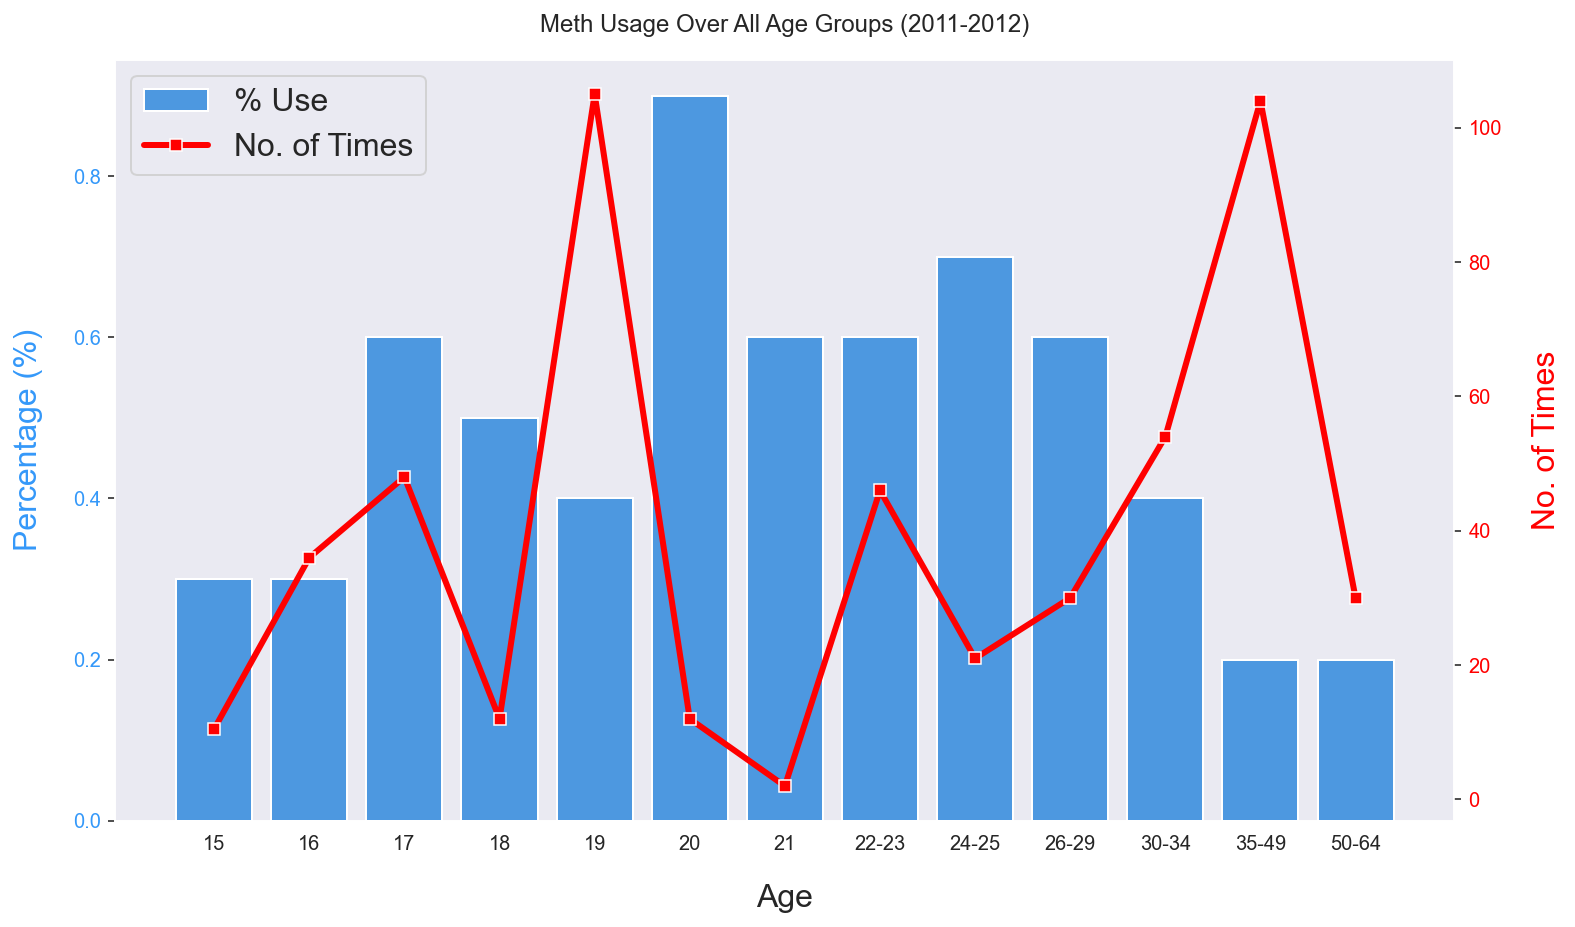

In [70]:
plot('meth-use', 'meth-frequency', 'Meth')

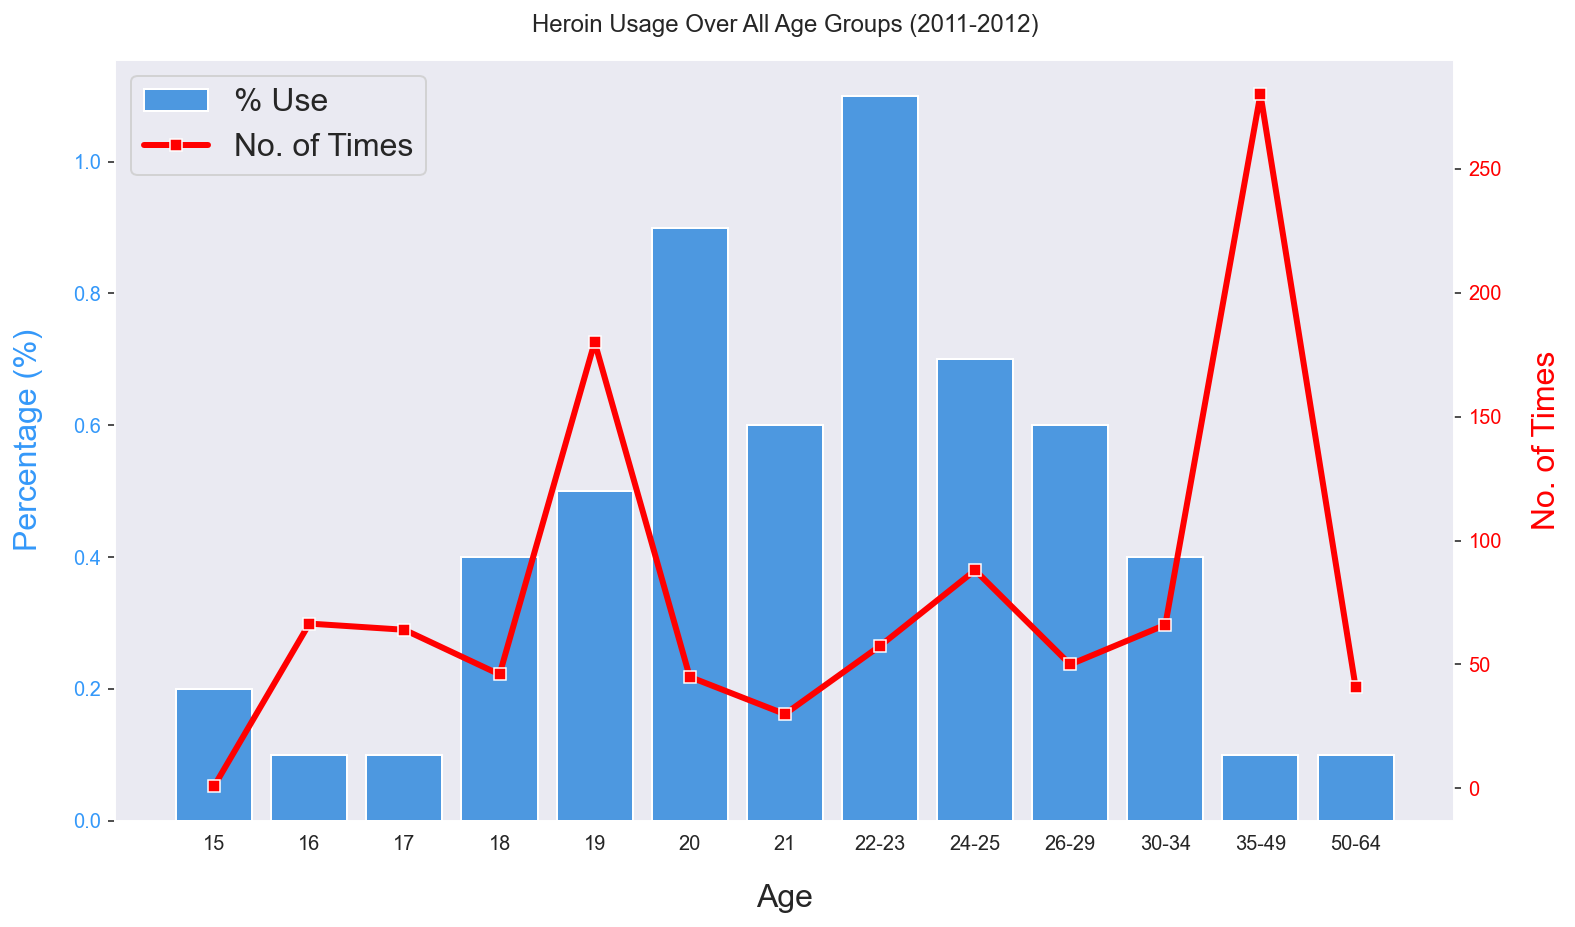

In [71]:
plot('heroin-use', 'heroin-frequency', 'Heroin')

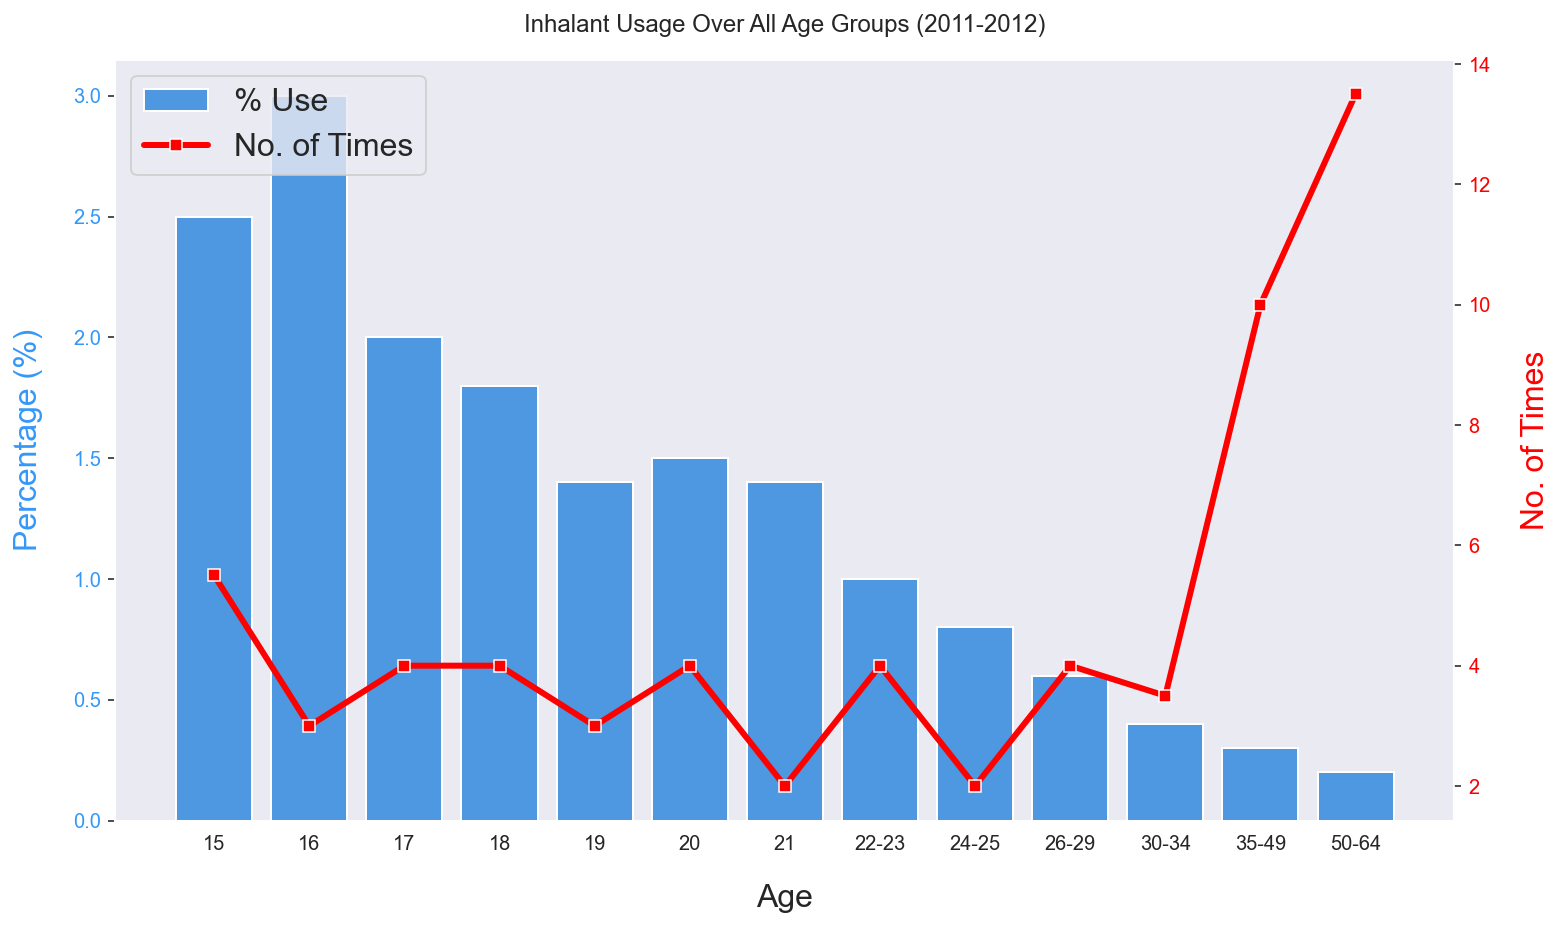

In [72]:
plot('inhalant-use', 'inhalant-frequency', 'Inhalant')

* Overview of the data shows that alcohol, marijuana and pain releiver are the top 3 drug used among all age group over the past 1 year. This is probably due to easier access to those drugs.
* From the correlation matrix, people who use drug tends to use more than one type of drug. People who use one type of drug freqently tends to use another similar type of drug frequently as well. e.g. cocaine and hallucinogen, pain releiver and oxycontin.
* Age 21-25 has the highest rate of alcohol usage. Marijuana usage is higher for younger age group 18-21. Pain releiver is popular among age 17-29.
* Overall most frequently used drugs are heroin, marijuana and meth.
* The overall average use rate increasing from 15 to 21 years old and decreasing after 21 years old. Age group 35-49 tends to use drug most frequently.
* Comparing drug usage between old and young age group, age group 50-64 has much lower overall drug use rate than younger groups, but the frequency of drug usage is higher.
* Inhalant use rate is higher among younger age group and decrease with age. This is because it is the most easily accessible drug. Common household product such as glue is often abused.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Question: Pain relief and stimulant has high correlation value. Is the drug use rate for pain relief the same as stimulant?

Deliverables: Accept or reject the null hypothesis.

* H0: The pain relief use rate is the same as stimulant.
* H1: The pain relief use rate is different from stimulant.

In [77]:
# Code
group1 = drug_use['pain'].values
group2 = drug_use['stimulant'].values
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("t_statistic = {}  p_value = {}".format(t_statistic, p_value))

t_statistic = 6.825200559855865  p_value = 2.263647472917783e-06


**Report**



...

* p value is too small, therefore we reject the hypothesis
* there are significant statistical difference between both values

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Our dataset is rather small, it is dangerous to callously remove any data.

In the SAT dataset, the is one data that looks like outlier. Math score for the state OH which is lower than the rest and stick out like a sore thumb.

There is no formal mathematical definition of outliers. The most common method is probably IQR. I need to reread this.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.